In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import holidays
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import (GridSearchCV,
                                     TimeSeriesSplit)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import holidays
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import (GridSearchCV,
                                     TimeSeriesSplit)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from xgboost import plot_importance, plot_tree

c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Calibri"
plt.style.use("ggplot")
teal = "#00C0D2"
light_blue = "#4251BC"
blue = "#262E6C"
dark_blue = "#111530"
black = "#000000"
cian = "#4AA6EE"

In [3]:
df : pd.DataFrame = pd.read_csv('./data/checkpoints/df_features_v1.csv',index_col='data-hora')
df.index = pd.to_datetime(df.index)
df.head(2)


C:\Users\augusto.lourencatto\AppData\Local\Temp\ipykernel_16164\3675590867.py:1: DtypeWarning: Columns (12,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df : pd.DataFrame = pd.read_csv('./data/checkpoints/df_features_v1.csv',index_col='data-hora')


,executado,data_medicao_A602,hora_medicao_A602,precipitacao_total_A602,pressao_atmosferica_A602,radiacao_global_A602,temperatura_ar_A602,temperatura_ponto_orvalho_A602,umidade_relativa_ar_A602,vento_direcao_A602,...,DayOfYear,WeekOfYear,lag_1,lag_7,lag_14,rolling_mean_1,rolling_mean_7,rolling_mean_14,el_nino,la_nina
data-hora,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,28212.46,2012-01-01,0,2.4,1007.3,-2.854,22.9,NaN,NaN,102.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 01:00:00,27511.77,2012-01-01,1,1.6,1007.6,-2.053,22.5,NaN,NaN,98.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [4]:
# Interpolando com o metodo de bfill
#TODO: Ver se é o melhor método, e fazer apenas para o valor target
#https://note.nkmk.me/en/python-pandas-interpolate/#:~:text=You%20can%20interpolate%20missing%20values,and%20Series%20with%20interpolate()%20.&text=Use%20dropna()%20and%20fillna,them%20with%20a%20specific%20value.

#bfill preenche com o próximo valor
#ffill preenche com o valor anterior
#spline interpolacao de spline



# df['val_cargaenergiahomwmed'] = df['val_cargaenergiahomwmed'].fillna(method='bfill')
# df['val_cargaenergiahomwmed'] = df['val_cargaenergiahomwmed'].fillna(method='ffill')
df = df.fillna(method='ffill')
df = df.interpolate(method='polynomial', order=2)
# df['val_cargaenergiahomwmed'] = df['val_cargaenergiahomwmed'].interpolate(method='time')

In [5]:
# df['val_cargaenergiahomwmed'].isnull().sum()
df.isnull().sum()

# df['val_cargaenergiahomwmed'][df['val_cargaenergiahomwmed'].isnull()]

executado                      0
data_medicao_A602              0
hora_medicao_A602              0
precipitacao_total_A602        0
pressao_atmosferica_A602       0
                            ... 
rolling_mean_1                95
rolling_mean_7               671
rolling_mean_14             1343
el_nino                        0
la_nina                        0
Length: 96, dtype: int64

In [6]:
columns_to_drop : list = ["dataref","max_executado","DATE","ORDINAL_DATE","LINREG","dia_semana"]
df.drop(columns_to_drop,axis=1,inplace=True)

In [7]:
df.to_csv("./data/checkpoints/df_final.csv")
df.head()

,executado,data_medicao_A602,hora_medicao_A602,precipitacao_total_A602,pressao_atmosferica_A602,radiacao_global_A602,temperatura_ar_A602,temperatura_ponto_orvalho_A602,umidade_relativa_ar_A602,vento_direcao_A602,...,DayOfYear,WeekOfYear,lag_1,lag_7,lag_14,rolling_mean_1,rolling_mean_7,rolling_mean_14,el_nino,la_nina
data-hora,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,28212.46,2012-01-01,0,2.4,1007.3,-2.854,22.9,NaN,NaN,102.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 01:00:00,27511.77,2012-01-01,1,1.6,1007.6,-2.053,22.5,NaN,NaN,98.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 02:00:00,26339.97,2012-01-01,2,6.0,1006.9,-1.742,22.5,NaN,NaN,105.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 03:00:00,25318.01,2012-01-01,3,1.6,1006.0,-2.066,22.6,NaN,NaN,99.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2012-01-01 04:00:00,24543.74,2012-01-01,4,0.6,1005.1,-1.992,22.7,NaN,NaN,57.0,...,1,52,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [8]:
# Filtrando apenas os dados maiores que 2017

# df : pd.DataFrame = df.loc['2017-02-17':'2020-01-01'] 
# print(df.shape)
# df.head()

In [9]:
# a

In [10]:
# Dropando algumas colunas não necessárias
df.drop(['Date'],axis=1,inplace=True)

In [11]:
df = df[df.columns.drop(list(df.filter(regex='data_medicao')))]
df = df[df.columns.drop(list(df.filter(regex='hora_medicao')))]

In [12]:
df['executado'] = df['executado']/1000
df['executado'].head()

data-hora
2012-01-01 00:00:00    28.21246
2012-01-01 01:00:00    27.51177
2012-01-01 02:00:00    26.33997
2012-01-01 03:00:00    25.31801
2012-01-01 04:00:00    24.54374
Name: executado, dtype: float64

In [13]:
# Dividindo os dados de treino e teste

# df_train_xg = df.loc["2012-01-01":"2021-11-31 00:00"]
# df_test_xg = df.loc["2021-12-01 00:00":"2021-12-31 23:00"]


df_train_xg, df_test_xg = train_test_split(df, test_size=0.3, shuffle=False)

print(df_train_xg.shape,df_test_xg.shape)
print(f"Dados de treinamento : {min(df_train_xg.index)} - {max(df_train_xg.index)}")
print(f"Dados de teste : {min(df_test_xg.index)} - {max(df_test_xg.index)}")

X_train_xg = df_train_xg.drop(columns=["executado"],axis=1)
y_train_xg = df_train_xg["executado"]
X_test_xg = df_test_xg.drop(columns=["executado"],axis=1)
y_test_xg = df_test_xg["executado"]

(61369, 75) (26301, 75)
Dados de treinamento : 2012-01-01 00:00:00 - 2019-01-01 02:00:00
Dados de teste : 2019-01-01 03:00:00 - 2021-12-31 23:00:00


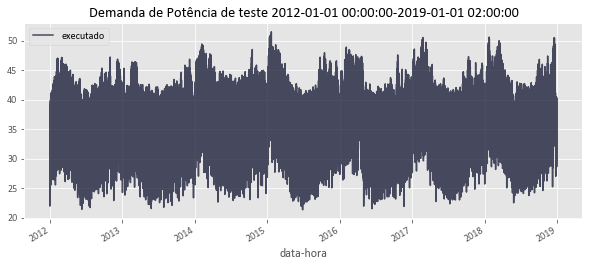

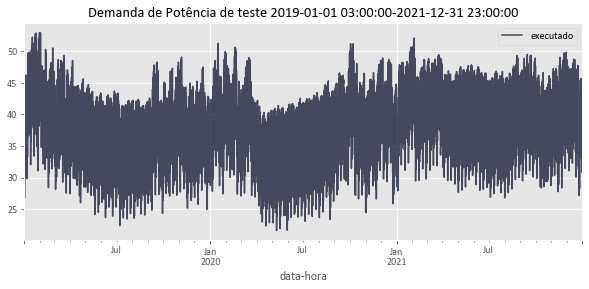

In [14]:
#Plots

df_train_lr : pd.DataFrame = df_train_xg.copy()
df_test_lr : pd.DataFrame = df_test_xg.copy()


# Comportamento dos dados de treino
df_train_lr.plot(
    y="executado",
    figsize=(10, 4),
    title=f"Demanda de Potência de teste {min(df_train_lr.index)}-{max(df_train_lr.index)}",
    c=dark_blue,
    alpha=0.75,
)
plt.show()

# Comportamento dos dados de teste
df_test_xg.plot(
    y="executado",
    figsize=(10, 4),
    title=f"Demanda de Potência de teste {min(df_test_xg.index)}-{max(df_test_xg.index)}",
    c=dark_blue,
    alpha=0.75,
)
plt.show()

# # 2019 - 2021
# df_demanda_potencia.loc["2019-01-01":"2021-12-31"].plot(
#     y="executado",
#     figsize=(10, 4),
#     title="Demanda de Potência 2019-2021",
#     c=dark_blue,
#     alpha=0.75,
# )
# plt.show()

# # Efeito Covid
# df_demanda_potencia.loc["2020-01-01":"2021-05-01"].plot(
#     y="executado",
#     figsize=(10, 4),
#     title="Demanda de Potência 2020 - 2021 (Efeito Covid 19)",
#     c=dark_blue,
#     alpha=0.75,
# )
# plt.show()

In [15]:
X_train_xg.to_csv("./data/temp/X_train_xg.csv")
y_train_xg.to_csv("./data/temp/y_train_xg.csv")

In [16]:
cv = TimeSeriesSplit(n_splits=5)

parameters = {"learning_rate": [0.1, 0.05],
              #The learning rate is the shrinkage you do at every step you are making

               "gamma" : [0.01, 0.1, 0.3, 0.5],
              #A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
              #Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
              
               "max_depth": [2, 4, 7, 10],
              #The maximum depth of a tree, same as GBM.
              #Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

               "colsample_bytree": [0.3, 0.6],
              #Denotes the fraction of columns to be randomly samples for each tree.

               "subsample": [0.2, 0.4, 0.5],
              #Denotes the fraction of observations to be randomly samples for each tree.
              #Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.

               "reg_alpha": [0, 0.5, 1],
              #L1 regularization term on weights. Increasing this value will make model more conservative.

               "reg_lambda": [1, 1.5, 2, 3, 4.5],
              #L2 regularization term on weights. Increasing this value will make model more conservative.

               "min_child_weight": [1, 3, 5, 7],
              #The larger min_child_weight is, the more conservative the algorithm will be.

               "n_estimators": [100, 250, 500]}
              #Number of tress or rounds. The more, the higher the risk of overfitting

xgbr = xgb.XGBRegressor(objective='reg:squarederror' , sampling_method = 'gradient_based', tree_method = 'gpu_hist')

xgb_rscv = RandomizedSearchCV(xgbr, param_distributions = parameters,  verbose = 3, random_state = 40, cv=cv)

In [17]:
# # Entendendo os folds (TODO)

# for fold, (train_index, test_index) in enumerate(cv.split(X_train_xg)):
#     print("Fold: {}".format(fold))
#     print("TRAIN indices:", train_index, "\n", "TEST indices:", test_index)
#     print("\n")
#     # X_train, X_test = X_train_xg[train_index], X[test_index]
#     # y_train, y_test = y[train_index], y[test_index]


# # plot_cv_indices(cv,5, X_train_xg, y_train_xg)

In [18]:
# Label containes NaN

# model_xgboost = xgb_rscv.fit(X_train_xg, y_train_xg)

In [19]:
# model_xgboost.best_estimator_

In [20]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0.3, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=np.nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=3, sampling_method='gradient_based', scale_pos_weight=1,
             subsample=0.4, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)


# reg = xgb.XGBRegressor()

In [21]:
# joblib.dump(reg, "./models/xgboost_v1.joblib.dat")
# loaded_model = joblib.load("./models/xgboost_v1.joblib.dat")

In [22]:
#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
import datetime as dt
from datetime import timedelta

def expandingWindowDiario(df : pd.DataFrame, test_start_date : dt, stop_date : dt):
  mae_modelo = []
  mape_modelo = []
  column_names = ["Date", "val_cargaenergiahomwmed"	,"EXECUTADO_MODELO"]
  df_previsao = pd.DataFrame(columns = column_names)
  # train_start_date = dt.datetime(2012,1,1,0,0,0)
  train_start_date = dt.datetime(2012,1,1,0,0,0)
  train_end_date = test_start_date
  test_end_date = test_start_date + timedelta(hours = 24)

  df.index = pd.to_datetime(df.index)

  while test_start_date < stop_date:

    print("TRAIN:",train_start_date," - ",train_end_date)
    print("TEST:",test_start_date," - ",test_end_date)

    df_train=df.loc[train_start_date:train_end_date].copy()
    df_test=df.loc[test_start_date:test_end_date].copy()

    columns_to_drop : list = ["val_cargaenergiahomwmed","nom_subsistema","id_subsistema","dataref","max_executado","DATE","ORDINAL_DATE","LINREG","dia_semana"]

    X_training = df_train.drop(columns=columns_to_drop).copy()
    y_training = df_train["val_cargaenergiahomwmed"].copy()
    X_test = df_test.drop(columns=columns_to_drop).copy()
    y_test = df_test["val_cargaenergiahomwmed"].copy()

    reg.fit(X_training, y_training,
          verbose=False)
    yhat = reg.predict(X_test)

    #Erro
    maeTeste = mean_absolute_error(y_test,yhat)
    mae_modelo.append(maeTeste)
    mape_teste = mean_absolute_percentage_error(y_test,yhat)
    mape_modelo.append(mape_teste)
    d = {'Date' :y_test.index ,'Real':y_test,'Modelo':yhat}
    previsao = pd.DataFrame(data=d)
    df_previsao=df_previsao.append(previsao)

    #Avança
    train_end_date = train_end_date + timedelta(days = 1)
    test_start_date = test_start_date + timedelta(days = 1)
    test_end_date = test_end_date + timedelta(days = 1)

  return ([df_previsao,mae_modelo, mape_modelo])
  # return 1,1,1

# df_train_xg = df.loc["2012-01-01":"2020-31-12 00:00"]
# df_test_xg = df.loc["2021-01-01 00:00":"2021-12-31 23:00"]



# df_previsao,mae_full,mape_full = expandingWindowDiario(df_completo,dt.datetime(2021,1,1,0,0,0),dt.datetime(2021,12,31,0,0,0))



# dt.datetime(2021,1,1,0,0,0)

In [24]:
%%time

reg.fit(X_train_xg, y_train_xg,
          verbose=False)

c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


CPU times: total: 3min 47s
Wall time: 4min 19s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             gamma=0.3, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=3, sampling_method='gradient_based', scale_pos_weight=1,
             subsample=0.4, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)

In [25]:
# Salvando modelo
# joblib.dump(reg, "./models/xgboost_v2_1000.joblib.dat")
xgb = joblib.load('./models/xgboost_v2_1000.joblib.dat')

In [26]:
yhat = reg.predict(X_test_xg)
maeTeste = mean_absolute_error(y_test_xg,yhat)
mape_teste = mean_absolute_percentage_error(y_test_xg,yhat)
maeTeste,mape_teste

(1.191235254270573, 3.156535398904553)

In [27]:
%%time
#Sem rooling windows
y_true, y_pred = np.array(y_test_xg), np.array(yhat)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape

CPU times: total: 0 ns
Wall time: 0 ns


3.156535398904553

In [28]:

feature_important = reg.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"])#.sort_values(by = "score", ascending=False)

data = data.sort_values(by = "score", ascending=False).head(20)

# data.plot(kind='barh', figsize = (20,10))

# data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

# data.to_csv("./data/feature_importance.csv")

data.head(10)

,score
rolling_mean_1,4205.0
lag_1,4054.0
pressao_atmosferica_A602,3919.0
lag_14,3676.0
rolling_mean_7,3545.0
lag_7,3499.0
temperatura_ponto_orvalho_A602,3380.0
vento_direcao_A602,3311.0
rolling_mean_14,3307.0
temperatura_ar_A602,3210.0


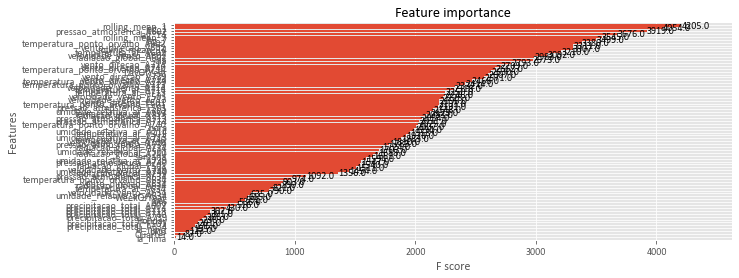

In [29]:
_ = plot_importance(reg, height=0.9)

In [30]:
# https://towardsdatascience.com/time-series-forecast-error-metrics-you-should-know-cc88b8c67f27

def mae(y, y_hat):
    """
    Calculate the mean absolute error between two arrays.
    Métrica calculada a partir da média absoluta das diferenças
    entre os valores reais e os previstos.
    """
    return np.mean(np.abs(y - y_hat))

def mse(y, y_hat):
    """
    Calculate the mean squared error between two arrays.
    Colocar mais atençao nos outliers
    """
    return np.mean(np.square(y - y_hat))

def rmse(y, y_hat):
    """
    Calculate the root mean squared error between two arrays.
    """
    return np.sqrt(np.mean(np.square(y - y_hat)))

def mape(y, y_hat):
    """
    Calculate the mean absolute percentage error between two arrays.
    """
    return np.mean(np.abs((y - y_hat)/y)*100)

In [37]:
# Montando o dataframe de previsão

#TODO : Comparar o mape com a literatura

df_resultado : pd.DataFrame = pd.DataFrame({"previsao":yhat,"real": y_test_xg})

# Criando coluna com diferência entre previsão e real
df_resultado['diferenca'] = abs(df_resultado['previsao'] - df_resultado['real'])
df_resultado['diferenca_percentual'] = abs(100 - abs(df_resultado['previsao'] / df_resultado['real']) * 100)

print(f"Métricas de erro : ")
print(f"Unidade KWmed : ")
print(f"MAE: {mae(df_resultado['real'],df_resultado['previsao'])}")
print(f"MSE: {mse(df_resultado['real'],df_resultado['previsao'])}")
print(f"RMSE: {rmse(df_resultado['real'],df_resultado['previsao'])}")
print(f"MAPE: {mape(df_resultado['real'],df_resultado['previsao'])}")

# Truncando as casas decimemais em 4
df_resultado["previsao"] = df_resultado["previsao"].round(4)
df_resultado["real"] = df_resultado["real"].round(4)
df_resultado["diferenca"] = df_resultado["diferenca"].round(4)
df_resultado["diferenca_percentual"] = df_resultado["diferenca_percentual"].round(4)



df_resultado.to_excel("./data/resultados/previsao_xgboost_v1.xlsx")
df_resultado.to_csv("./data/resultados/previsao_xgboost_v1.csv")
df_resultado.head()

Métricas de erro : 
Unidade KWmed : 
MAE: 1.191235254270573
MSE: 2.5212210325194007
RMSE: 1.5878353291570888
MAPE: 3.1565353989045533


,previsao,real,diferenca,diferenca_percentual
data-hora,,,,
2019-01-01 03:00:00,28.666300,29.9909,1.3246,4.4167
2019-01-01 04:00:00,27.561501,29.4284,1.8669,6.3437
2019-01-01 05:00:00,27.578100,28.9441,1.3660,4.7196
2019-01-01 06:00:00,27.502399,27.5912,0.0888,0.3220
2019-01-01 07:00:00,26.928900,26.7706,0.1583,0.5914


In [32]:
df_resultado.head(20)

,previsao,real,diferenca,diferenca_percentual
data-hora,,,,
2019-01-01 03:00:00,28.666300,29.9909,1.3246,4.4167
2019-01-01 04:00:00,27.561501,29.4284,1.8669,6.3437
2019-01-01 05:00:00,27.578100,28.9441,1.3660,4.7196
2019-01-01 06:00:00,27.502399,27.5912,0.0888,0.3220
2019-01-01 07:00:00,26.928900,26.7706,0.1583,0.5914
2019-01-01 08:00:00,27.098900,27.4922,0.3933,1.4304
2019-01-01 09:00:00,28.439199,28.5375,0.0984,0.3448
2019-01-01 10:00:00,29.692900,29.4046,0.2884,0.9806
2019-01-01 11:00:00,31.858801,30.0959,1.7629,5.8576


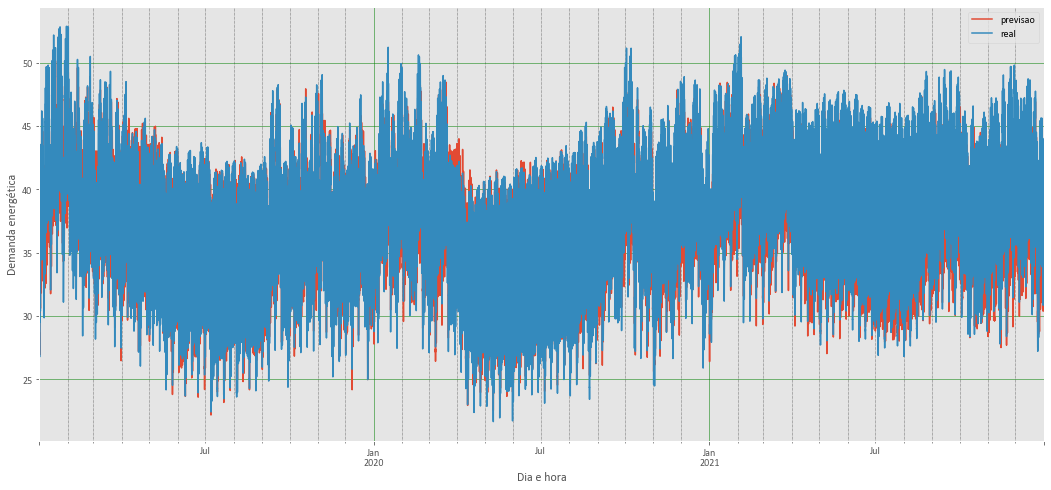

In [39]:
df_resultado[['previsao','real']].plot(kind='line',figsize=(18,8))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')

plt.xlabel("Dia e hora")
plt.ylabel("Demanda energética")
plt.show()


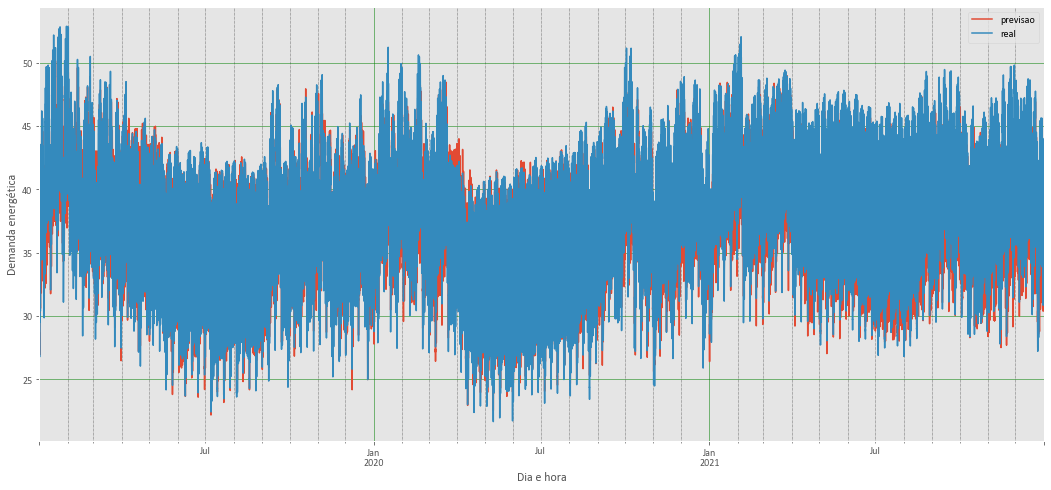

In [33]:
df_resultado[['previsao','real']].plot(kind='line',figsize=(18,8))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')

plt.xlabel("Dia e hora")
plt.ylabel("Demanda energética")
plt.show()



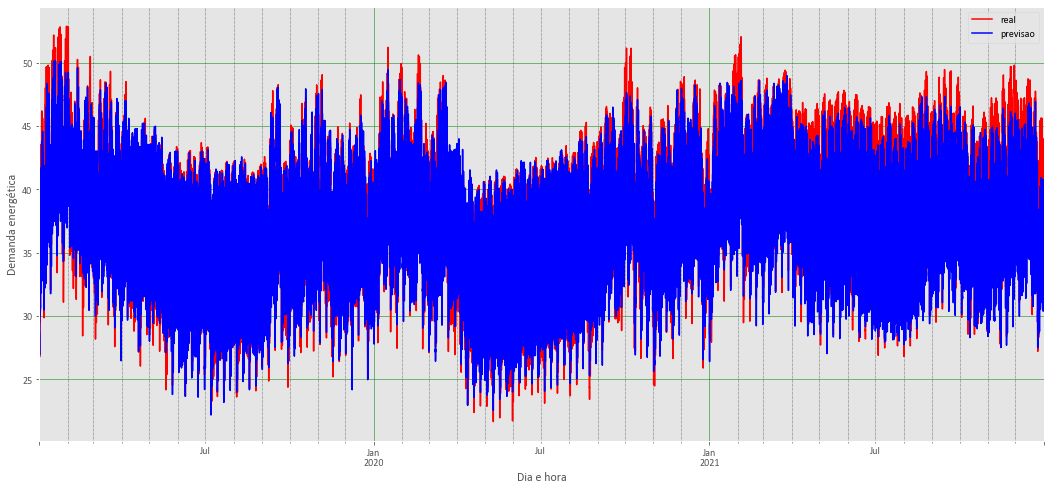

In [52]:
# Real X Previsão

df_resultado[['real','previsao']].plot(kind='line',figsize=(18,8),style={'real': 'r', 'previsao': 'b'})
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xlabel("Dia e hora")
plt.ylabel("Demanda energética")
plt.show()


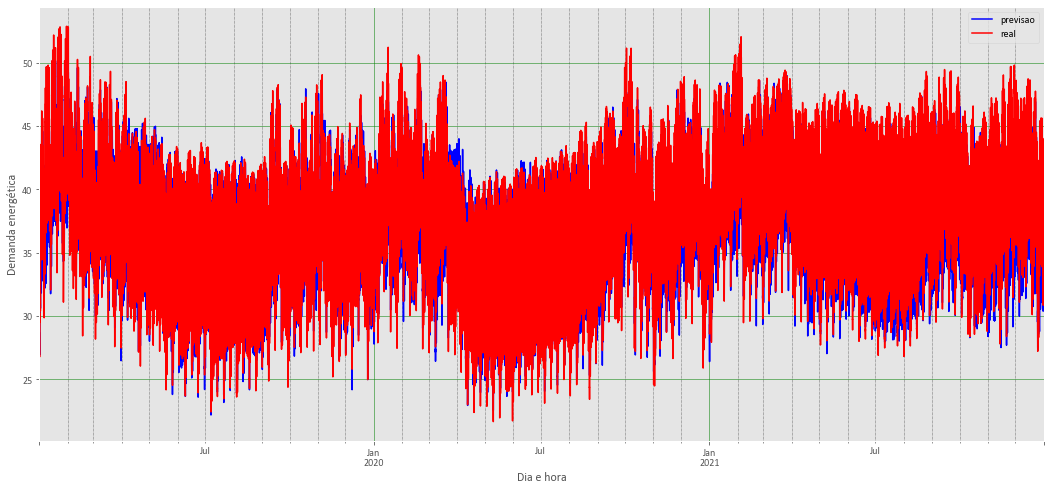

In [53]:
# Previsão X Real  

df_resultado[['previsao','real']].plot(kind='line',figsize=(18,8),style={'real': 'r', 'previsao': 'b'})
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xlabel("Dia e hora")
plt.ylabel("Demanda energética")
plt.show()


In [35]:
df_resultado.sort_values('diferenca_percentual',ascending=False).head(10)

,previsao,real,diferenca,diferenca_percentual
data-hora,,,,
2019-02-17 06:00:00,34.765900,28.4349,6.3310,22.2650
2019-02-17 01:00:00,38.056400,31.3298,6.7266,21.4701
2021-01-08 15:00:00,38.009102,47.4682,9.4591,19.9272
2019-02-17 00:00:00,38.945202,32.4832,6.4620,19.8934
2021-11-29 16:00:00,40.025101,49.7371,9.7120,19.5266
2019-02-17 05:00:00,35.070301,29.3694,5.7009,19.4109
2021-01-07 14:00:00,38.195301,47.3945,9.1992,19.4099
2021-06-03 17:00:00,34.493401,42.6711,8.1777,19.1646
2021-01-07 15:00:00,38.779099,47.7251,8.9459,18.7447


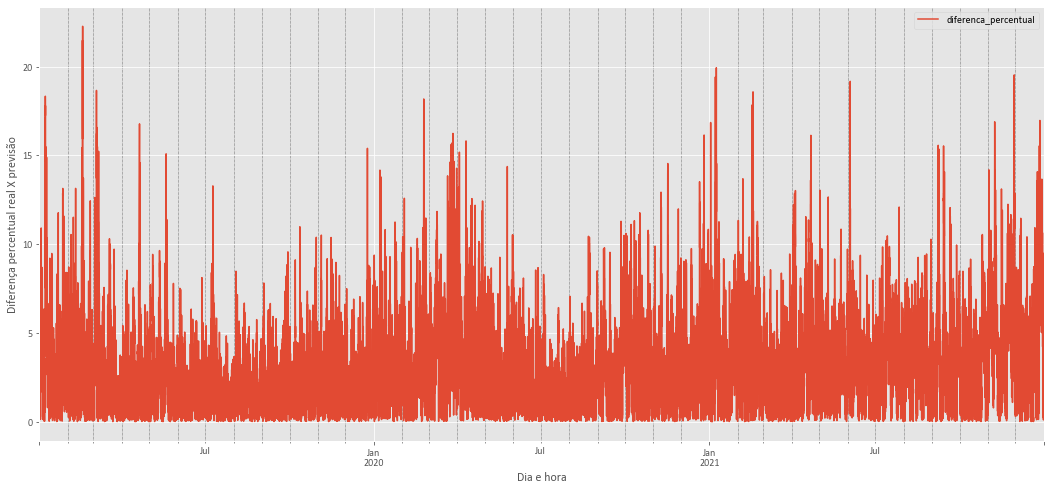

In [40]:
df_resultado[['diferenca_percentual']].plot(kind='line',figsize=(18,8))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xlabel("Data")
plt.ylabel("Demanda energética")

plt.xlabel("Dia e hora")
plt.ylabel("Diferença percentual real X previsão")

plt.show()

Text(0, 0.5, '')

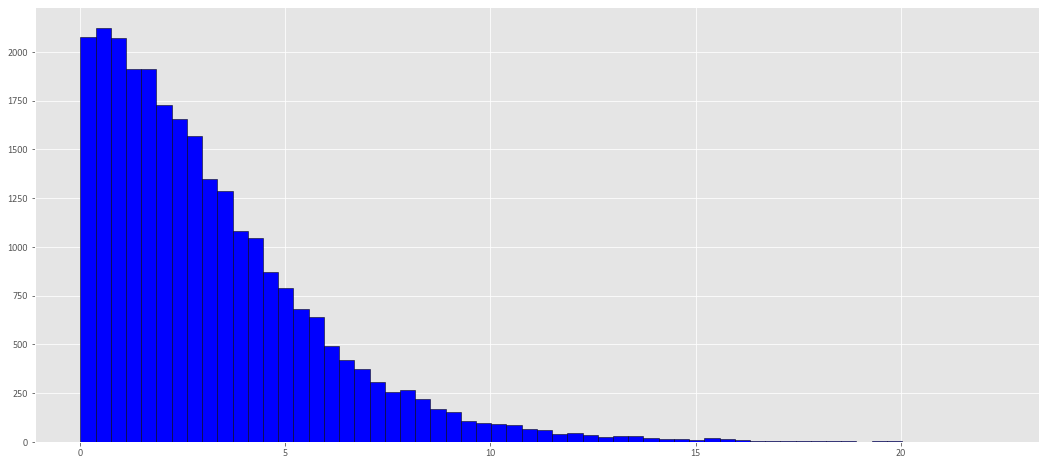

In [55]:
# Plotando o histograma

df_resultado[['diferenca_percentual']].hist(color='blue',edgecolor='black',figsize=(18,8),bins=60)

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.title("")
plt.xlabel("")
plt.ylabel("")